### Importing Python Packages and Utility Functions

In [3]:
import pandas as pd
import numpy as np

import datetime
import os, sys
import importlib
import utils
importlib.reload(utils)

from utils import plot_series, plot_series_with_names, plot_series_bar
from utils import plot_dataframe
from utils import get_universe_adjusted_series, scale_weights_to_one, scale_to_book_long_short
from utils import generate_portfolio, backtest_portfolio
from utils import match_implementations

import plotly.graph_objects as go

Write the directory where you have stored the parquet files in the code below

In [7]:
# This directory can be used if you're working on a Kaggle Notebook inside the competition
# Change the directory as per your requirements if you're working somewhere else

week2 = r"C:\Users\arnav\OneDrive\Desktop\backtesting soc\week2"  # Write the directory where you have stored the parquet files

features = pd.read_parquet(os.path.join(week2, "myfeatures.parquet"))

universe = pd.read_parquet(os.path.join(week2, "myuniverse.parquet"))

returns = features["Close"].pct_change(fill_method=None)
 
# returns = pd.read_parquet(os.path.join(data_dir, "returns.parquet"))

In [8]:
# returns = returns.iloc[1:]

In [9]:
# universe = universe.iloc[1:]

In [10]:
# features = features.iloc[1:]

In [11]:
returns

,1,2,3,4,5,6,7,8,9,10,...,494,495,496,497,498,499,500,501,502,503
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,-0.016056,-0.009722,-0.009492,NaN,-0.012191,-0.001152,-0.001666,-0.007834,-0.017604,-0.001952,...,0.000245,0.001701,-0.014833,0.004809,-0.008039,0.005886,-0.003132,-0.002614,-0.011924,0.000150
2020-01-06,0.002956,0.007968,0.007892,NaN,0.005239,0.003922,-0.006530,0.005726,-0.011749,-0.007823,...,0.001223,-0.002038,-0.001979,-0.001436,0.007678,-0.006474,-0.000589,-0.005779,0.007655,-0.007677
2020-01-07,0.003066,-0.004703,-0.005705,NaN,-0.005559,-0.008272,-0.021590,-0.000959,0.022751,-0.012046,...,-0.002053,-0.006467,0.004745,-0.002077,-0.008184,-0.003760,0.001768,-0.000879,-0.005969,0.003380
2020-01-08,0.009873,0.016086,0.007087,NaN,0.004076,-0.009963,0.001962,0.013438,0.009032,-0.011084,...,0.001127,0.003768,0.006274,-0.000960,-0.015080,0.003396,0.001765,0.011974,-0.034429,-0.002171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,0.004534,-0.005548,0.015401,-0.009079,0.005070,-0.004315,0.016344,-0.002316,0.004178,0.007472,...,0.007300,0.007329,-0.003307,0.008614,0.001769,0.008506,0.000154,0.007605,0.015454,0.001644
2023-12-26,0.001719,-0.002841,-0.002065,-0.014773,0.001834,-0.004469,-0.002878,-0.000818,0.008980,0.013014,...,-0.004165,0.007858,0.006415,0.003061,0.002257,0.008700,0.002000,0.009142,0.022605,0.002667
2023-12-27,0.000072,0.000518,0.001682,-0.015643,0.005127,0.000408,0.001103,-0.003644,0.002414,-0.003039,...,0.000878,0.003754,-0.004066,-0.003078,-0.004700,0.006689,0.004453,-0.002388,0.001053,0.007161


In [12]:
universe

,1,2,3,4,5,6,7,8,9,10,...,494,495,496,497,498,499,500,501,502,503
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2020-01-03,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2020-01-06,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2020-01-07,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2020-01-08,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2023-12-26,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2023-12-27,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [13]:
features

Close                                                  \
                   1           2           3           4           5     
Date                                                                     
2020-01-02   82.885254   72.620834   70.934250         NaN   78.908424   
2020-01-03   81.554451   71.914818   70.260941         NaN   77.946465   
2020-01-06   81.795540   72.487854   70.815430         NaN   78.354836   
2020-01-07   82.046295   72.146935   70.411446         NaN   77.919228   
2020-01-08   82.856323   73.307503   70.910461         NaN   78.236862   
...                ...         ...         ...         ...         ...   
2023-12-22  138.080856  192.192551  146.723541  140.800003  105.848412   
2023-12-26  138.318283  191.646561  146.420486  138.720001  106.042572   
2023-12-27  138.328186  191.745819  146.666718  136.550003  106.586235   
2023-12-28  138.278717  192.172699  146.543610  137.000000  107.178429   
2023-12-29  137.779251  191.130325  146.751953  136.139999  106.858063   

                                                                      ...  \
                  6           7           8           9          10   ...   
Date                                                                  ...   
2020-01-02  41.268997  193.477844  334.429993  108.940224  39.462341  ...   
2020-01-03  41.221451  193.155594  331.809998  107.022469  39.385319  ...   
2020-01-06  41.383106  191.894333  333.709991  105.765114  39.077213  ...   
2020-01-07  41.040779  187.751297  333.390015  108.171326  38.606506  ...   
2020-01-08  40.631893  188.119583  337.869995  109.148293  38.178593  ...   
...               ...         ...         ...         ...        ...  ...   
2023-12-22  70.214340  345.652008  598.750000  192.098038  67.514664  ...   
2023-12-26  69.900551  344.657288  598.260010  193.823090  68.393326  ...   
2023-12-27  69.929077  345.037567  596.080017  194.290924  68.185463  ...   
2023-12-28  70.423546  342.862946  595.520020  195.158340  68.279945  ...   
2023-12-29  70.623230  342.199860  596.599976  193.520981  68.232704  ...   

            Volume                                                         \
               494      495      496      497       498      499      500   
Date                                                                        
2020-01-02  465800  4973500  3006500  2915400  12456400   869500  1369900   
2020-01-03  411400  3111000  1760500  2422500  17386900   795100  1145500   
2020-01-06  620200  2178600  1357900  2217100  20081900   817300  1454100   
2020-01-07  443200  2426200  1722100  1861100  17387700   662200  1388600   
2020-01-08  486400  2299800  1176200  4828900  15137700  1083200  1521500   
...            ...      ...      ...      ...       ...      ...      ...   
2023-12-22  328600  2253500  1170500  2429300  12921800   829300   991500   
2023-12-26  296900  2542300  1150000  2147500  16835100   440300   627500   
2023-12-27  323300  2109200  1142200  2865900  14558800  1007700  1050400   
2023-12-28  265200  2586100  1233000  2421900  16329300   709100   882500   
2023-12-29  336900  3079100  1144800  2813300  17741400   698900  1196800   

                                      
                501     502      503  
Date                                  
2020-01-02  1083972  387800  1576700  
2020-01-03   992405  305300  1274000  
2020-01-06   972423  322600  2334100  
2020-01-07   934519  236300  1224500  
2020-01-08   936064  689600  1766700  
...             ...     ...      ...  
2023-12-22  1337800  225900  1548400  
2023-12-26  1870700  220000   814600  
2023-12-27  1058600  275700   766400  
2023-12-28   662200  193900   880100  
2023-12-29   849600  251300  1007200  

[1006 rows x 2515 columns]

### Strategy: Vectorized Portfolio Generation

In this step we will write a vectorized code to generate our strategy portfolio for all trading days at once without a `for` loop. For doing this we will use direct operations on feature dataframes. But, here's one caution. It is very easy to look into the future feature data when you're using dataframes to construct your portfolio at once.

Below is a vectorized implementation of the benchmark strategy. Make sure to note the `alpha.shift(1)` operation in the code! This is to make sure you use only feature values upto the last trading day to construct today's portfolio weights.

You can change the code below to implement your own strategy. Since this vectorized implementation is faster, you can try various versions of your strategy and see their performances.

#### Inputs:
- `entire_features :pd.DataFrame`: Historical feature data (MultiIndex columns: Feature Names, Stock Identifiers).
- `universe: pd.DataFrame`: Binary DataFrame indicating tradable stocks per day.
- `start_date`, `end_date` :`str`: Backtest period in `'YYYY-MM-DD'` format.

#### Output:
- `portfolio(pd.DataFrame)`: Normalized portfolio weights for each stock per day in the specified date range.


In [14]:
# A Benchmark Strategy for your reference: 
# This is the code used to generate the Benchmark submission you see in the Kaggle Leaderboard

# This strategy shows how you can combine different features 
def generate_portfolio_vectorized(
    entire_features: pd.DataFrame,
    universe: pd.DataFrame,
    start_date: str,
    end_date: str,
):
    # Validate date format
    try:
        start_dt = datetime.datetime.strptime(start_date, '%Y-%m-%d')
        end_dt = datetime.datetime.strptime(end_date, '%Y-%m-%d')
        cutoff_date = datetime.datetime.strptime('2005-01-01', '%Y-%m-%d')
    except ValueError:
        raise ValueError("start_date and end_date must be strings in 'YYYY-MM-DD' format.")

    # Ensure start_date is before end_date
    if start_dt >= end_dt:
        raise ValueError("start_date must be earlier than end_date.")

    # Ensure start_date is not before '2005-01-01'
    if start_dt < cutoff_date:
        raise ValueError("start_date must be later than '2005-01-01'.")

    # Get trading days within the date range
    trading_days = universe.index[(universe.index >= start_dt) & (universe.index <= end_dt)]

    if len(trading_days) == 0:
        raise ValueError("No Trading Days in the specified dates")
    
    portfolio = 0

    universe_boolean = universe.loc[:end_date].astype(bool)
    
    features_ = entire_features.loc[:end_date]

    close = entire_features["Close"].loc[:end_date]

    # Calculate returns
    returns = close.pct_change()

    # Momentum: mean return over last momentum_days
    momentum = returns.rolling(window=20).mean()

    # Reversal: negative mean return over short window
    reversal = -returns.rolling(window=5).mean()

    # Combine signals
    signal = 0.7 * momentum + 0.3 * reversal

    # Volatility adjustment (rolling std over 20 days)
    volatility = returns.rolling(window=20).std()
    signal = signal / (volatility + 1e-8)

    # Shift signal to avoid look-ahead bias
    signal = signal.shift(1)

    # Apply tradability filter
    signal = signal.where(universe_boolean, np.nan)

    # Normalize portfolio weights daily
    signal = signal.sub(signal.mean(axis=1), axis=0)
    signal = signal.div(signal.abs().sum(axis=1), axis=0)

    # Clip weights to max weight cap
    signal = signal.clip(lower=-0.08, upper=0.08)

    return signal.fillna(0).loc[start_date:end_date]


In [15]:
import pandas as pd
import numpy as np

df = features

# If df has a MultiIndex on columns (Feature, StockID)
if isinstance(df.columns, pd.MultiIndex):
    # Compute mean across all stocks for each feature (collapse StockID)
    mean_features = df.groupby(level=0, axis=1).mean()

elif df.ndim == 3:
    # If df is a true 3D NumPy-like array, collapse stock axis (axis=2)
    mean_features = df.mean(axis=2)

else:
    # Standard case: Extract feature names and compute mean
    feature_names = sorted(set(col.rsplit(".", 1)[0] for col in df.columns))
    mean_features = pd.DataFrame({
        feature: df.filter(regex=f"^{feature}\.\d+$").mean(axis=1)
        for feature in feature_names
    })

# Convert to NumPy (optional)
mean_matrix = mean_features.to_numpy()

# Print details
print(f"Extracted Mean Feature Matrix Shape: {mean_matrix.shape}")  # Should be (time_steps, 22)
print(mean_features.head())  # Preview first few rows


Extracted Mean Feature Matrix Shape: (1006, 5)
                 Close        High         Low        Open        Volume
Date                                                                    
2020-01-02  118.258694  119.107291  116.883816  118.200173  5.012462e+06
2020-01-03  117.965858  118.693179  116.519114  116.991744  4.945078e+06
2020-01-06  118.112238  118.616554  116.640639  117.353944  5.181459e+06
2020-01-07  118.005480  118.885542  117.011043  117.903807  5.547663e+06
2020-01-08  118.474046  119.547238  117.357270  118.118744  6.051231e+06


<>:19: SyntaxWarning: invalid escape sequence '\.'
<>:19: SyntaxWarning: invalid escape sequence '\.'
C:\Users\arnav\AppData\Local\Temp\ipykernel_3016\2121857171.py:19: SyntaxWarning: invalid escape sequence '\.'
  feature: df.filter(regex=f"^{feature}\.\d+$").mean(axis=1)
C:\Users\arnav\AppData\Local\Temp\ipykernel_3016\2121857171.py:9: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  mean_features = df.groupby(level=0, axis=1).mean()


### Generate your portfolio using the `generate_portfolio_vectorized` function you wrote above

In [16]:

# Compute mean across all columns 
returns_mean = returns.mean(axis=1).to_numpy().reshape(-1, 1)  

# Ensure mean_matrix is already computed (from previous step)
assert mean_matrix.shape[0] == returns_mean.shape[0], "Row mismatch between mean_matrix and returns!"

# Concatenate the return column
final_matrix = np.hstack((mean_matrix, returns_mean))

# Convert back to DataFrame
final_df = pd.DataFrame(final_matrix, columns=list(mean_features.columns) + ["return"])

# Print details
print(f"Final Matrix Shape: {final_matrix.shape}")  
print(final_df.head())  # Preview first few rows




Final Matrix Shape: (1006, 6)
        Close        High         Low        Open        Volume    return
0  118.258694  119.107291  116.883816  118.200173  5.012462e+06       NaN
1  117.965858  118.693179  116.519114  116.991744  4.945078e+06 -0.004642
2  118.112238  118.616554  116.640639  117.353944  5.181459e+06  0.001301
3  118.005480  118.885542  117.011043  117.903807  5.547663e+06 -0.000715
4  118.474046  119.547238  117.357270  118.118744  6.051231e+06  0.003071


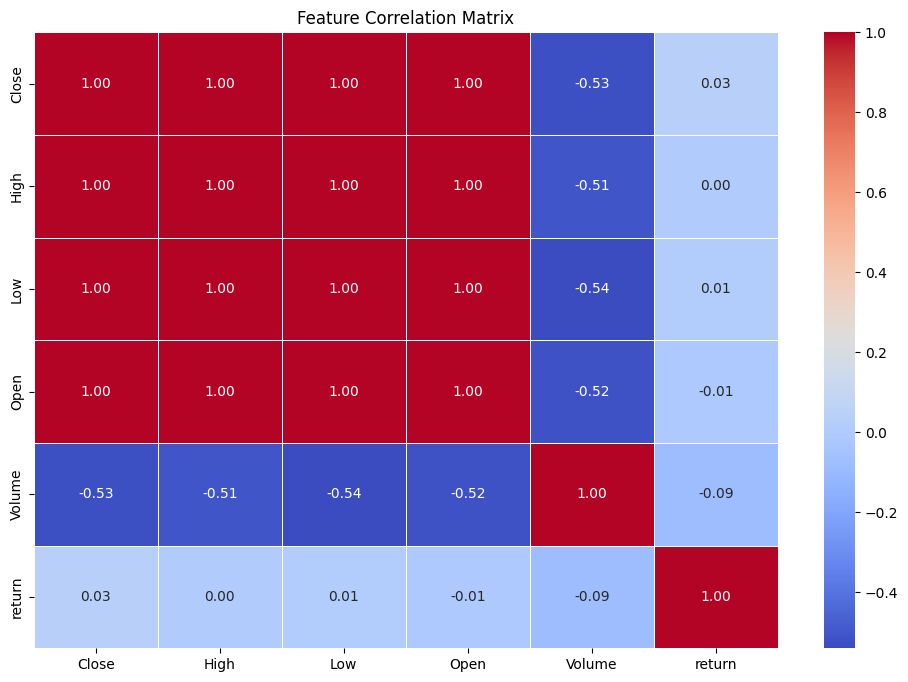

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
correlation_matrix = final_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()

In [19]:
benchmark_portfolio_vectorized = generate_portfolio_vectorized(
    features,
    universe,
    "2020-01-02",
    "2023-12-29"
)

C:\Users\arnav\AppData\Local\Temp\ipykernel_3016\649306922.py:42: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = close.pct_change()


In [20]:
benchmark_portfolio_vectorized

,1,2,3,4,5,6,7,8,9,10,...,494,495,496,497,498,499,500,501,502,503
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,0.001530,0.000447,0.005517,0.001624,0.001442,-0.006962,-0.001471,-0.004817,0.001475,-0.000053,...,-0.003856,-0.000689,-0.001975,-0.000458,-0.003744,0.002490,-0.001119,-0.000009,0.001749,0.002855
2023-12-26,0.000707,0.001517,0.004549,0.002356,0.000253,-0.007518,-0.001375,-0.004107,0.002163,-0.000048,...,-0.003802,-0.001044,-0.002172,-0.001363,-0.003996,0.001879,-0.001988,0.000689,0.001635,0.001894
2023-12-27,0.001823,0.000751,0.004295,0.002912,0.001194,-0.007626,-0.002000,-0.003277,0.000380,-0.002699,...,-0.003659,-0.000765,-0.001848,-0.000636,-0.003685,0.001601,-0.000902,-0.000106,0.000562,0.002574


### Backtest your portfolio generated using vectorized code

Note that you can backtest your portfolio till `2023-12-29` since this is the last date in the training period. You don't have access to returns after this date. 

In [2]:
sr_vectorized, pnl_vectorized = backtest_portfolio(benchmark_portfolio_vectorized.loc[:"2023-12-29"], returns.loc[:"2023-12-29"], universe.loc[:"2023-12-29"], True, True)

NameError: name 'backtest_portfolio' is not defined